# Dataset Creation

In [1]:
#Clear previously stored variables
%reset -f

## 1. Imports

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import nibabel as nib

## 2. Creating Lists of Image Paths and MGMT Labels


### 2.1 Glob Function

In [3]:
import glob # for loading the data
def insensitive_glob(pattern):
    def either(c):
        return '[%s%s]' % (c.lower(), c.upper()) if c.isalpha() else c
    return glob.glob(''.join(map(either, pattern)))

### 2.2 Dataset - Ivy Foundation


#### 2.2.1 Loading Labels from Excel


In [4]:
ivy_data = pd.read_excel('/trials/Ivy_Foundation/Document_final/Ivy_OS_Data_September2018_JEG_edits.xlsx')
ivy_data = ivy_data[['ID', 'MGMT']]

ivy_labels = {}

for i in ivy_data.index:
    if (ivy_data['MGMT'][i] == "Methylated"):
        ivy_labels[ivy_data['ID'][i]] = (0,1)
    elif (ivy_data['MGMT'][i] == "Unmethylated"):
        ivy_labels[ivy_data['ID'][i]] = (1,0)


#### 2.2.2 Adding Labels and Image Path to Lists

In [5]:
ivy_root = '/trials/Ivy_Foundation/Final_for_Distribution'
ivy_t1 = []
ivy_t1c = []
ivy_t2 = []
ivy_flair = []
ivy_mgmt = []
ivy_id = []

#Pre
for key in ivy_labels.keys():
    t1_path = ivy_root + '/Pre/' + "{:05d}".format(key) + '/NIFTI_Native/reg/_bet/t1.special.nii.gz'
    t1c_path = ivy_root + '/Pre/' + "{:05d}".format(key) + '/NIFTI_Native/reg/_bet/t1+c.final.nii.gz'
    t2_path = ivy_root + '/Pre/' + "{:05d}".format(key) + '/NIFTI_Native/reg/_bet/t2.final.nii.gz'
    flair_path = ivy_root + '/Pre/' + "{:05d}".format(key) + '/NIFTI_Native/reg/_bet/flair.final.nii.gz'
    
    if (os.path.isfile(t1c_path)) and (os.path.isfile(t2_path)) and (os.path.isfile(flair_path) and os.path.isfile(t1_path)):
        ivy_t1.append(t1_path)
        ivy_t1c.append(t1c_path)
        ivy_t2.append(t2_path)
        ivy_flair.append(flair_path)
        ivy_mgmt.append(ivy_labels[key])
        ivy_id.append("i" + str(key))

#Post
for key in ivy_labels.keys():
    t1_path = ivy_root + '/Post/' + "{:05d}".format(key) + '/NIFTI_Native/reg/_bet/t1.special.nii.gz'
    t1c_path = ivy_root + '/Post/' + "{:05d}".format(key) + '/NIFTI_Native/reg/_bet/t1+c.final.nii.gz'
    t2_path = ivy_root + '/Post/' + "{:05d}".format(key) + '/NIFTI_Native/reg/_bet/t2.final.nii.gz'
    flair_path = ivy_root + '/Post/' + "{:05d}".format(key) + '/NIFTI_Native/reg/_bet/flair.final.nii.gz'
    
    if (os.path.isfile(t1c_path)) and (os.path.isfile(t2_path)) and (os.path.isfile(flair_path) and os.path.isfile(t1_path)):
        ivy_t1.append(t1_path)
        ivy_t1c.append(t1c_path)
        ivy_t2.append(t2_path)
        ivy_flair.append(flair_path)
        ivy_mgmt.append(ivy_labels[key])
        ivy_id.append("I" + str(key))

print(len(ivy_t1c))

assert(len(ivy_t1c) == len(ivy_mgmt))
assert(len(ivy_mgmt) == len(ivy_t2))
assert(len(ivy_t2) == len(ivy_flair))
assert(len(ivy_t1c) == len(ivy_t1))

571


### 2.3 Dataset - Atlas Concatenated

#### 2.3.1 Loading Labels from Excel


In [6]:
atlas_data = pd.read_excel('/trials/AVAglio/Analysis/labels.xlsx', header=1, sheet_name="VOLUMES")
atlas_data = atlas_data[['PT', 'S_MGMT']]
PT_conversion = pd.read_excel('/trials/AVAglio/Analysis/labels.xlsx', header=1, sheet_name="Sheet2")
PT_conversion = PT_conversion[['ID','PT']]

conversion_table = {}
atlas_labels = {}

for i in PT_conversion.index:
    conversion_table[PT_conversion['PT'][i]] = PT_conversion['ID'][i]

for i in atlas_data.index:
    IDnum = conversion_table.get(atlas_data['PT'][i], -1)
    exists = (IDnum != -1)
    if (atlas_data['S_MGMT'][i] == 1) and exists:
        atlas_labels[IDnum] = (0,1)
    elif (atlas_data['S_MGMT'][i] == 0) and exists:
        atlas_labels[IDnum] = (1,0)

print(len(atlas_labels))

603


#### 2.3.2 Adding Labels and Image Paths to List


In [7]:
atlas_root = '/trials/AVAglio/DATA/Review'
atlas_t1 = []
atlas_t1c = []
atlas_t2 = []
atlas_flair = []
atlas_mgmt = []
atlas_id = []

error_counter = 0

for key in atlas_labels.keys():
    t1_path = atlas_root + '/*-' + "{:04d}".format(key) + '/data/1/reg/_bet/t1.special.nii.gz'
    t1c_path = atlas_root + '/*-' + "{:04d}".format(key) + '/data/1/reg/_bet/t1+c.final.nii.gz'
    t2_path = atlas_root + '/*-' + "{:04d}".format(key) + '/data/1/reg/_bet/t2.final.nii.gz'
    flair_path = atlas_root + '/*-' + "{:04d}".format(key) + '/data/1/reg/_bet/flair.final.nii.gz'

    t1_path = insensitive_glob(t1_path)
    t1c_path = insensitive_glob(t1c_path)
    t2_path = insensitive_glob(t2_path)
    flair_path = insensitive_glob(flair_path)

    if len(t1_path) < 1:
        t1_path = insensitive_glob(atlas_root + '/*-' + "{:04d}".format(key) + '/data/1/*/NIFTI_Native/reg/_bet/t1.special.nii.gz')
    if len(t1c_path) < 1:
        t1c_path = insensitive_glob(atlas_root + '/*-' + "{:04d}".format(key) + '/data/1/*/NIFTI_Native/reg/_bet/t1+c.final.nii.gz')
    if len(t2_path) < 1:
        t2_path = insensitive_glob(atlas_root + '/*-' + "{:04d}".format(key) + '/data/1/*/NIFTI_Native/reg/_bet/t2.final.nii.gz')
    if len(flair_path) < 1:
        flair_path = insensitive_glob(atlas_root + '/*-' + "{:04d}".format(key) + '/data/1/*/NIFTI_Native/reg/_bet/flair.final.nii.gz')


    
    try:
        if ((os.path.isfile(t1c_path[0])) and (os.path.isfile(t2_path[0]))) and (os.path.isfile(flair_path[0]) and os.path.isfile(t1_path[0])):
            atlas_t1.append(t1_path[0])
            atlas_t1c.append(t1c_path[0])
            atlas_t2.append(t2_path[0])
            atlas_flair.append(flair_path[0])
            atlas_mgmt.append(atlas_labels[key])
            atlas_id.append("a" + str(key))
    except:
        error_counter += 1

print('Valid Data from Atlas: ')
print(len(atlas_t1c))
print()
print('Errors from Atlas')
print(error_counter)

assert(len(atlas_t1c) == len(atlas_mgmt))
assert(len(atlas_mgmt) == len(atlas_t1))

Valid Data from Atlas: 
427

Errors from Atlas
176


### 2.4 Dataset - BRaTs

#### 2.4.1 Loading Labels

In [8]:
brats_root = '/synapse_data/Ashley/Data/rsna-miccai-brain-tumor-radiogenomic-classification/'
brats_data = pd.read_csv(brats_root + "train_labels.csv")
brats_data = brats_data[['MGMT_value', 'BraTS21ID']]

brats_labels = {}

for i in range(len(brats_data)):
    mgmtp = brats_data['MGMT_value'][i]
    brats_labels[brats_data['BraTS21ID'][i]] = (int(not mgmtp), mgmtp)


#### 2.4.2 Adding Labels and Image Paths to List

In [9]:
brats_root = '/synapse_data/Ashley/Data/rsna-miccai-brain-tumor-radiogenomic-classification/train/'
brats_t1 = []
brats_t1c = []
brats_t2 = []
brats_flair = []
brats_mgmt = []
brats_id = []

error_counter = 0

for key in brats_labels.keys():
    t1_path = brats_root + "{:05d}".format(key) + "/NIFTI_Native/T1w.nii.gz"
    t1c_path = brats_root + "{:05d}".format(key) + "/NIFTI_Native/T1wCE.nii.gz"
    t2_path = brats_root + "{:05d}".format(key) + "/NIFTI_Native/T2w.nii.gz"
    flair_path = brats_root + "{:05d}".format(key) + "/NIFTI_Native/FLAIR.nii.gz"

    try:
        if ((os.path.isfile(t1c_path)) and (os.path.isfile(t2_path))) and (os.path.isfile(flair_path) and os.path.isfile(t1_path)):
            brats_t1.append(t1_path)
            brats_t1c.append(t1c_path)
            brats_t2.append(t2_path)
            brats_flair.append(flair_path)
            brats_mgmt.append(brats_labels[key])
            brats_id.append("b" + str(key))
    except:
        error_counter += 1


print('Valid Data from BraTS: ')
print(len(brats_t1c))
print()
print('Errors from BraTS')
print(error_counter)

Valid Data from BraTS: 
576

Errors from BraTS
0


## 3. Create Data Dictionaries

In [10]:
dataset_ivy = pd.DataFrame(np.column_stack([ivy_t1, ivy_t1c, ivy_t2, ivy_flair, ivy_id, ivy_mgmt]), columns=['t1', 't1c', 't2', 'flair', 'id', 'MGMTn', 'MGMTp'])
dataset_atlas = pd.DataFrame(np.column_stack([atlas_t1, atlas_t1c, atlas_t2, atlas_flair, atlas_id, atlas_mgmt]), columns=['t1', 't1c', 't2', 'flair', 'id', 'MGMTn', 'MGMTp'])
dataset_brats = pd.DataFrame(np.column_stack([brats_t1, brats_t1c, brats_t2, brats_flair, brats_id, brats_mgmt]), columns=['t1', 't1c', 't2', 'flair', 'id', 'MGMTn', 'MGMTp'])

dataset_all = result = pd.concat([dataset_ivy, dataset_atlas])
print("Initial list  size  All - "  + str(dataset_all.shape))
dataset_all.head()
dataset_all.to_csv('pathlist.csv')

Initial list  size  All - (998, 7)


## 4. Check Dataset

### 4.1 Dataset Distribution

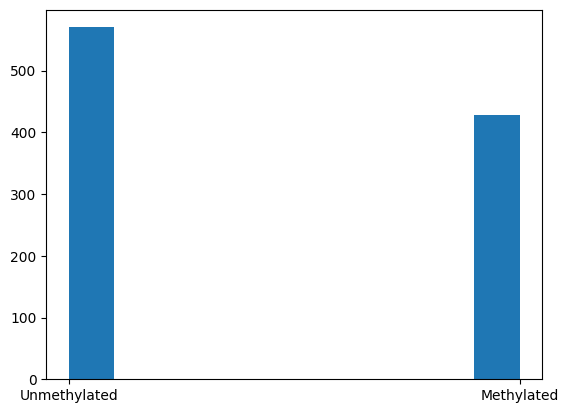

In [11]:
import matplotlib.pyplot as plt

bins = [0,1]
classes = ["Unmethylated", "Methylated"]
plt.hist(dataset_all["MGMTp"])
plt.xticks(bins, labels=classes)
plt.show()

## 5. Shuffle and Split Dataset

### 5.1 Shuffle the Dataset


In [12]:
# Shuffle dataframe and reset indices
dataset_all = dataset_all.sample(frac=1, random_state=6)
dataset_all = dataset_all.reset_index(drop=True)
dataset_all.head()

,t1,t1c,t2,flair,id,MGMTn,MGMTp
0,/trials/AVAglio/DATA/Review/200518-7200/data/1...,/trials/AVAglio/DATA/Review/200518-7200/data/1...,/trials/AVAglio/DATA/Review/200518-7200/data/1...,/trials/AVAglio/DATA/Review/200518-7200/data/1...,a7200,1,0
1,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,i245,0,1
2,/trials/AVAglio/DATA/Review/200411-3901/data/1...,/trials/AVAglio/DATA/Review/200411-3901/data/1...,/trials/AVAglio/DATA/Review/200411-3901/data/1...,/trials/AVAglio/DATA/Review/200411-3901/data/1...,a3901,0,1
3,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,I1236,1,0
4,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,/trials/Ivy_Foundation/Final_for_Distribution/...,I2253,1,0


### 5.2 Train/Valid/Test Split

In [13]:
train_size = int(dataset_all.shape[0] * 0.75)
valid_size = int(dataset_all.shape[0] * 0.15)
test_size = int(dataset_all.shape[0] * 0.10)

print(train_size, valid_size, test_size)

dictionary_train = [
    {"t1c": a, "t2": b, "flair": c, "MGMTn": d, "t1": e, "MGMTp": f, "id": g}
    for a, b, c, d, e, f, g in zip(dataset_all[:train_size].t1c, dataset_all[:train_size].t2, dataset_all[:train_size].flair, dataset_all[:train_size].MGMTn, dataset_all[:train_size].t1, dataset_all[:train_size].MGMTp, dataset_all[:train_size].id)
]

dictionary_valid = [
    {"t1c": a, "t2": b, "flair": c, "MGMTn": d, "t1": e, "MGMTp": f, "id": g}
    for a, b, c, d, e, f, g in zip(dataset_all[train_size:train_size+valid_size].t1c, dataset_all[train_size:train_size+valid_size].t2, dataset_all[train_size:train_size+valid_size].flair, dataset_all[train_size:train_size+valid_size].MGMTn, dataset_all[train_size:train_size+valid_size].t1, dataset_all[train_size:train_size+valid_size].MGMTp, dataset_all[train_size:train_size+valid_size].id)
]

dictionary_test = [
    {"t1c": a, "t2": b, "flair": c, "MGMTn": d, "t1": e, "MGMTp": f, "id": g}
    for a, b, c, d, e, f, g in zip(dataset_all[-test_size:].t1c, dataset_all[-test_size:].t2, dataset_all[-test_size:].flair, dataset_all[-test_size:].MGMTn, dataset_all[-test_size:].t1, dataset_all[-test_size:].MGMTp, dataset_all[-test_size:].id)
]

print(len(dictionary_train), len(dictionary_valid), len(dictionary_test))

748 149 99
748 149 99


### 5.3 Visualize Distribution of Each Split

In [14]:
badIDs = [
          'b551', 'b709', 'b558', 'b834', 'I3284', 'b6', 'I1446', 'b729', 'b62', 'I1365', 'i438'
          , 'I5880', 'a2055', 'i4179', 'i888', 'I3944', 'i2054', 'I1092', 'I309', 'I2975', 'i1033', 'i455', 'I888', 
          'i2100', 'I3384', 'i3219', 'i5887', 'i3850', 'I3597', 'I29', 'I10', 'I3596', 'I3220', 'i2975', 'i3385',
          'i3944', 'i3109', 'i778', 'I268', 'i1130', 'i3096', 'i386', 'i959', 'i25', 'I659', 'i3120', 
          'i57', 'i167', 'i288', 'i376', 'i383', 'i384', 'i393', 'i394', 'i409', 'i450', 'i451', 'i482', 'i613', 'i656',
          'i659', 'i661', 'i672', 'i695', 'i788', 'i815', 'i858', 'i945', 'i988', 'i1092', 'i1097', 'i1124', 'i1137', 'i1168', 
          'i1169', 'i1207', 'i1307', 'i1417', 'i1424', 'i1449', 'i1451', 'i1522', 'i1599', 'i1600', 'i1789', 'i1825', 'i1971', 
          'i2041', 'i2105', 'i2186', 'i2253', 'i2684', 'i2730', 'i3002', 'i3097', 'i3098', 'i3116', 'i3119', 
          'i3214', 'i3221', 'i3384', 'i3388', 'i3591', 'i3594', 'i3596', 'i3598', 'i3804', 'i3943', 'i4777', 'i5889',
          'i5921', 'I17', 'I237', 'I245', 'I334', 'I340', 'I372', 'I376', 'I384', 'I390', 'I405', 'I406', 'I409', 'I410',
          'I411', 'I412', 'I413', 'I449', 'I450', 'I454', 'I474', 'I613', 'I656', 'I661', 'I669', 'I695', 'I778', 'I815', 
          'I840', 'I855', 'I857', 'I858', 'I859', 'I959', 'I998', 'I1011', 'I1013', 'I1015', 'I1097', 'I1124', 'I1130', 
          'I1158', 'I1168', 'I1169', 'I1171', 'I1221', 'I1258', 'I1389', 'I1417', 'I1424', 'I1522', 'I1553', 'I1599', 'I1600',
          'I1649', 'I1789', 'I1855', 'I1895', 'I1971', 'I2041', 'I2100', 'I2186', 'I2363', 'I2451', 'I2486', 'I2969', 'I3095',
          'I3096', 'I3097', 'I3098', 'I3116', 'I3117', 'I3119', 'I3142', 'I3215', 'I3219', 'I3381', 'I3382', 'I3385', 'I3388',
          'I3594', 'I3598', 'I3802', 'I3805', 'I3850', 'I3943', 'I4130', 'I4204', 'I4587', 'I4779', 'a3108', 'i17'
         ]

badIDs = set(badIDs)

size_before = len(dictionary_train) + len(dictionary_valid) + len(dictionary_test)

dictionary_train = [item for item in dictionary_train if item['id'] not in badIDs]
dictionary_valid = [item for item in dictionary_valid if item['id'] not in badIDs]
dictionary_test = [item for item in dictionary_test if item['id'] not in badIDs]

size_after = len(dictionary_train) + len(dictionary_valid) + len(dictionary_test)

print("Removed " + str(size_before - size_after) + " damaged scans")
print(len(dictionary_train), len(dictionary_valid), len(dictionary_test))

Removed 193 damaged scans
607 123 73


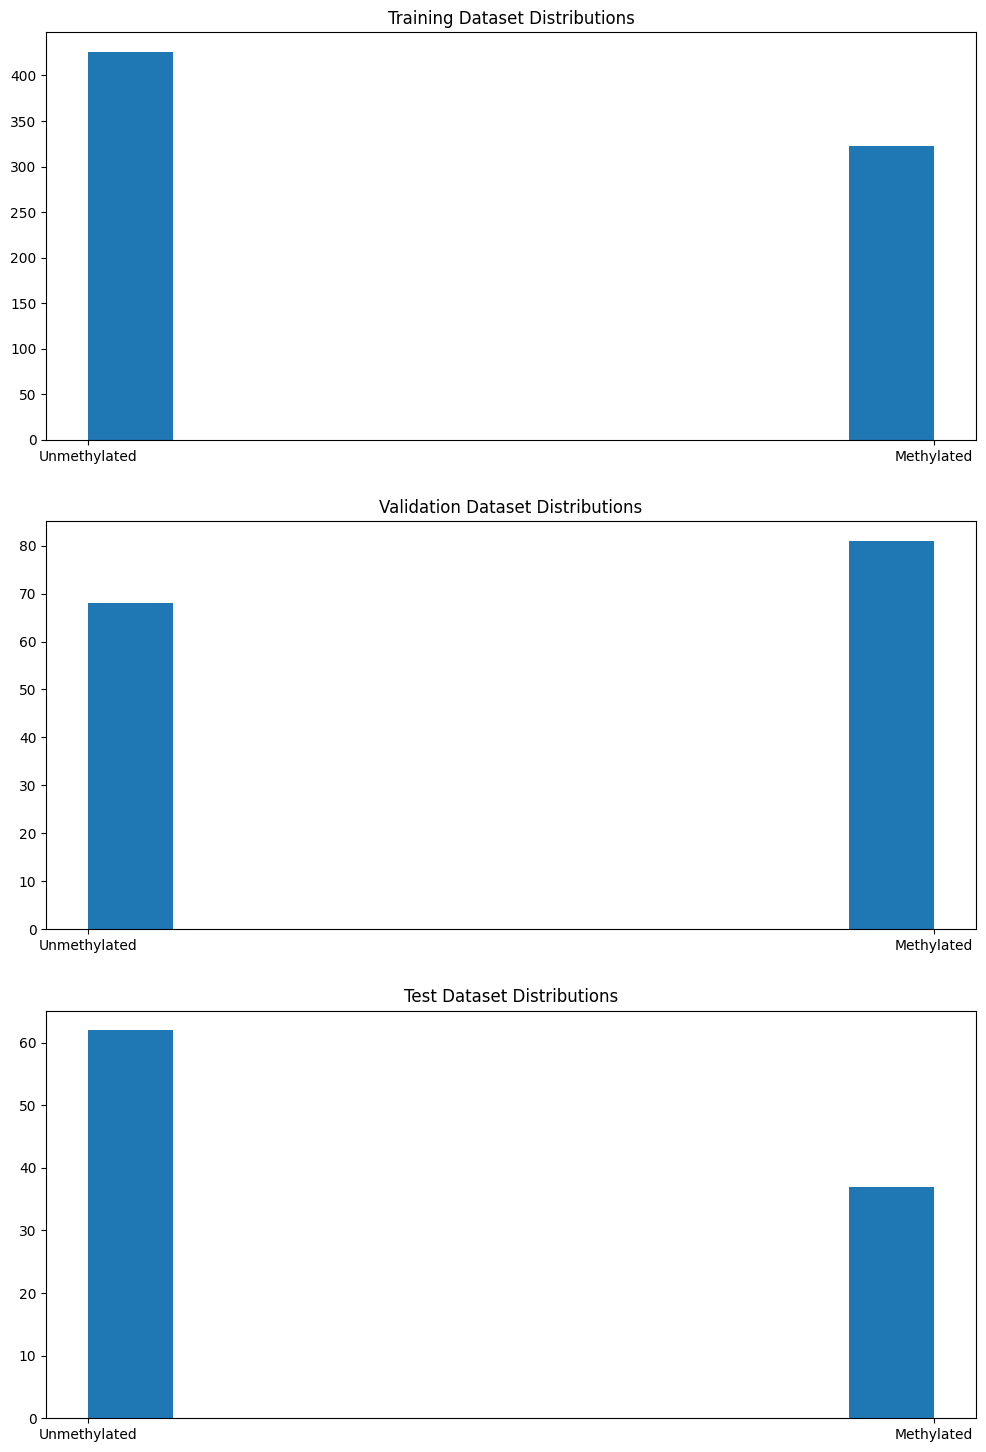

In [15]:
bins = [0, 1]
mgmt_status = ["Unmethylated", "Methylated"]


plt.figure("distributions", (12,18))

plt.subplot(3, 1, 1)
plt.title("Training Dataset Distributions")
plt.hist(dataset_all[:train_size].MGMTp)
plt.xticks(bins, labels=mgmt_status)

plt.subplot(3, 1, 2)
plt.title("Validation Dataset Distributions")
plt.hist(dataset_all[train_size:train_size+valid_size].MGMTp)
plt.xticks(bins, labels=mgmt_status)

plt.subplot(3, 1, 3)
plt.title("Test Dataset Distributions")
plt.hist(dataset_all[-test_size:].MGMTp)
plt.xticks(bins, labels=mgmt_status)

plt.show()


## 6. Store Datasets

In [16]:
%store dictionary_train
%store dictionary_valid
%store dictionary_test

Stored 'dictionary_train' (list)
Stored 'dictionary_valid' (list)
Stored 'dictionary_test' (list)
